In [4]:
!pip install tensorflow
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [5]:
data_path='/content/drive/MyDrive/UAS AI/dataset_cat_dog'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))


print(label_dict)
print(categories)
print(labels)

{'cats': 0, 'dogs': 1}
['cats', 'dogs']
[0, 1]


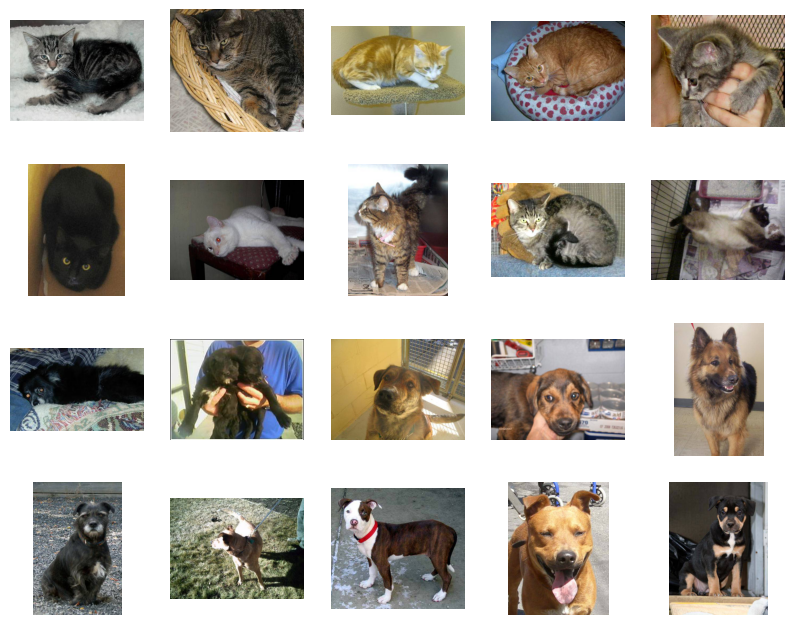

In [6]:
fig = plt.gcf()
fig.set_size_inches(10, 10)

cat_dir = os.path.join('/content/drive/MyDrive/UAS AI/dataset_cat_dog/cats')
dog_dir = os.path.join('/content/drive/MyDrive/UAS AI/dataset_cat_dog/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-10:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-10:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(5, 5, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()

In [7]:
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)

In [8]:
base_dir = '/content/drive/MyDrive/UAS AI/dataset_cat_dog'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(244,244),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 42)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(244,244),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 42)

Found 838 files belonging to 2 classes.
Using 755 files for training.
Found 838 files belonging to 2 classes.
Using 83 files for validation.


In [9]:
cnn = Sequential()

# first layer
cnn.add(Conv2D(32,(3,3),input_shape=(244,244,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# second layer
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# flattern layer
cnn.add(Flatten())

# Dense layer
cnn.add(Dense(512,activation='relu'))
cnn.add(Dense(1,activation='sigmoid'))

In [10]:
# summary of the model
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 121, 121, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 222784)            0         
                                                                 
 dense (Dense)               (None, 512)               1

In [11]:
# compile the model
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_history = cnn.fit(train_datagen,epochs=15,validation_data=test_datagen)

Epoch 1/15
18/18 [==============================] - 157s 7s/step - loss: 1442.2789 - accuracy: 0.5338 - val_loss: 0.8415 - val_accuracy: 0.4699
Epoch 2/15
18/18 [==============================] - 126s 7s/step - loss: 0.5820 - accuracy: 0.7205 - val_loss: 0.7525 - val_accuracy: 0.6627
Epoch 3/15
18/18 [==============================] - 132s 7s/step - loss: 0.3332 - accuracy: 0.9113 - val_loss: 0.8362 - val_accuracy: 0.7470
Epoch 4/15
18/18 [==============================] - 121s 7s/step - loss: 0.1689 - accuracy: 0.9589 - val_loss: 1.3524 - val_accuracy: 0.7108
Epoch 5/15
18/18 [==============================] - 118s 6s/step - loss: 0.0752 - accuracy: 0.9815 - val_loss: 1.6761 - val_accuracy: 0.6265
Epoch 6/15
18/18 [==============================] - 125s 7s/step - loss: 0.0467 - accuracy: 0.9960 - val_loss: 2.4114 - val_accuracy: 0.6024
Epoch 7/15
18/18 [==============================] - 121s 7s/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 2.7764 - val_accuracy: 0.6145
Epoch 8/15

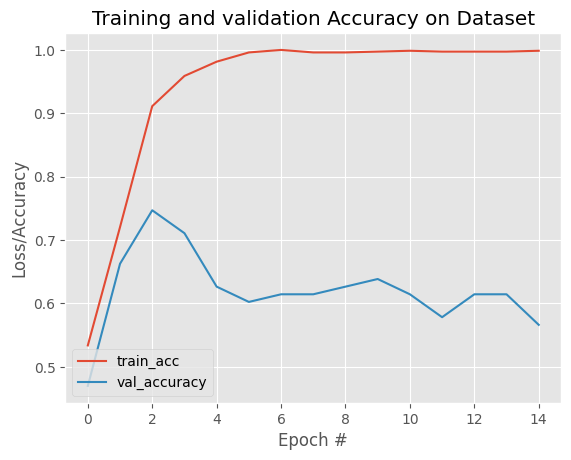

In [12]:
import matplotlib.pyplot as plt
import numpy as np
N = 15
plt.style.use("ggplot")
plt.figure()
H=model_history

plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")

plt.title("Training and validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

1/1 [==============================] - 0s 227ms/step
Anjing


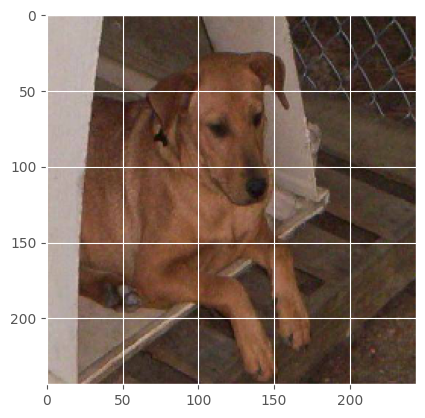

In [13]:
import keras.utils as image

#Input image
test_image = image.load_img('/content/drive/MyDrive/UAS AI/dataset_cat_dog/dogs/dog.100.jpg',target_size=(244,244))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = cnn.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Anjing")
else:
  print("Kucing")

1/1 [==============================] - 0s 218ms/step
Kucing


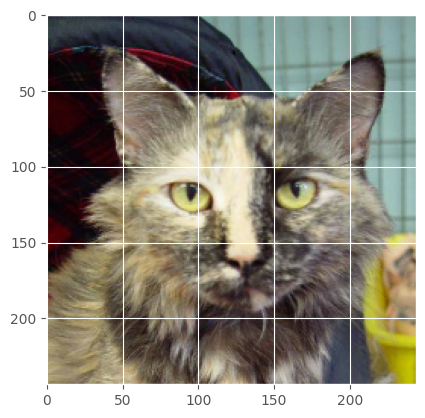

In [15]:
import keras.utils as image

test_image = image.load_img('/content/drive/MyDrive/UAS AI/dataset_cat_dog/cats/cat.10.jpg', target_size=(244, 244))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = cnn.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
    print("Anjing")
else:
    print("Kucing")